# ***ASSIGNMENT - 15***

## Importing Required Libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy import stats

# Loading the Dataset

data = pd.read_excel("EastWestAirlines.xlsx",sheet_name=1)

print("\nFirst 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

print("\nChecking Missing Values:")
print(data.isnull().sum())


First 5 rows of the dataset:
   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  

Dataset Information:
<clas

## **Data Preprocessing**


Missing Values:
ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

Dataset shape after outlier removal:
(3630, 12)


/tmp/ipython-input-914814925.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


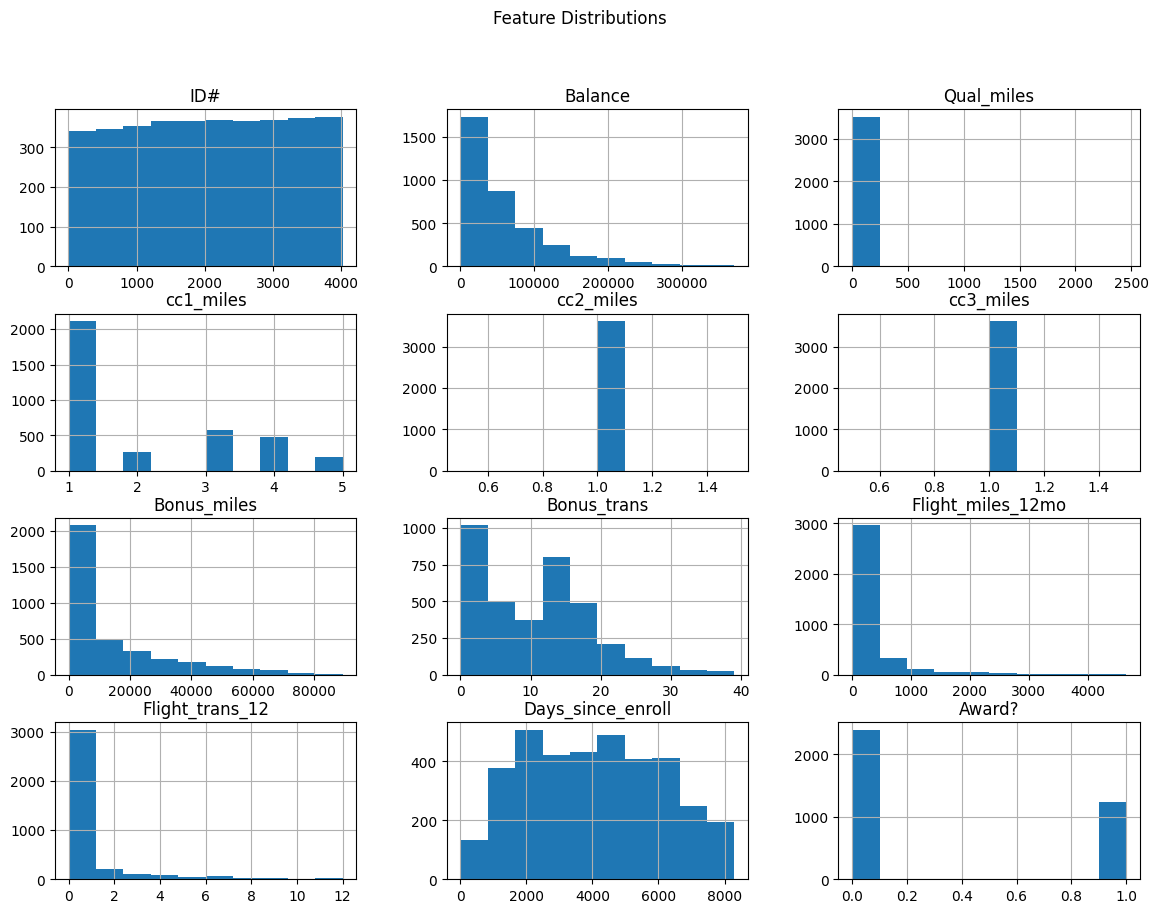

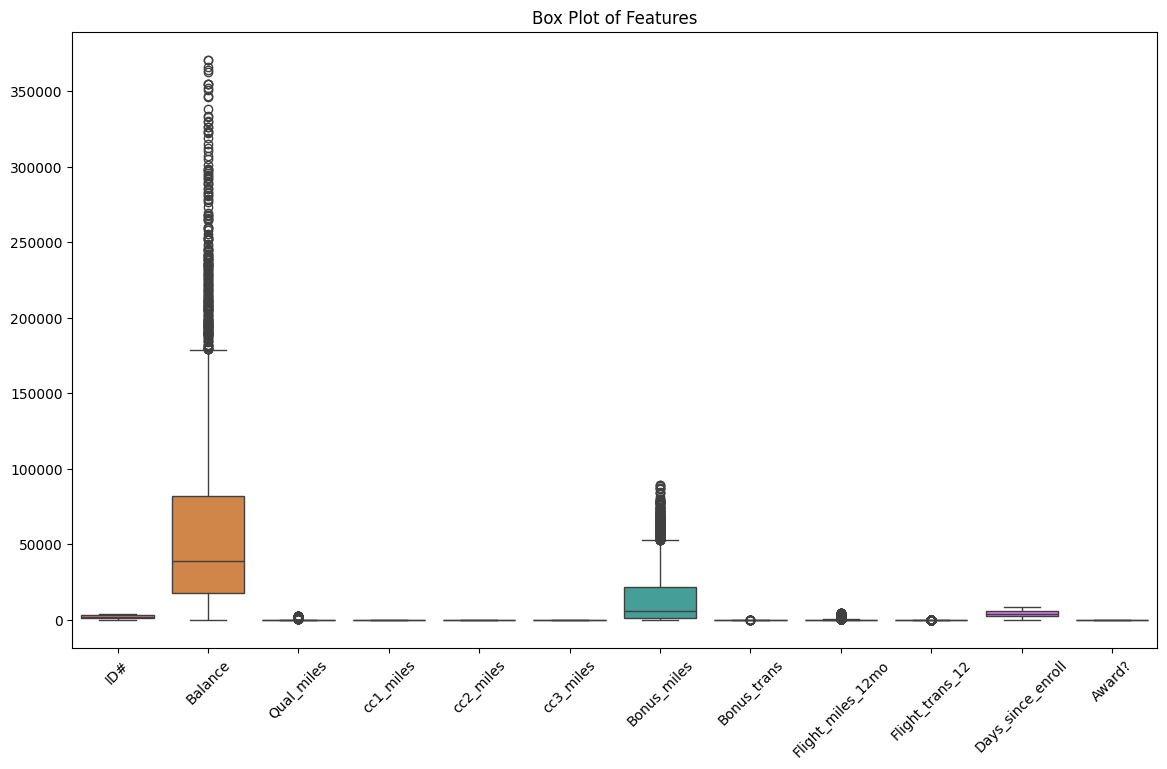

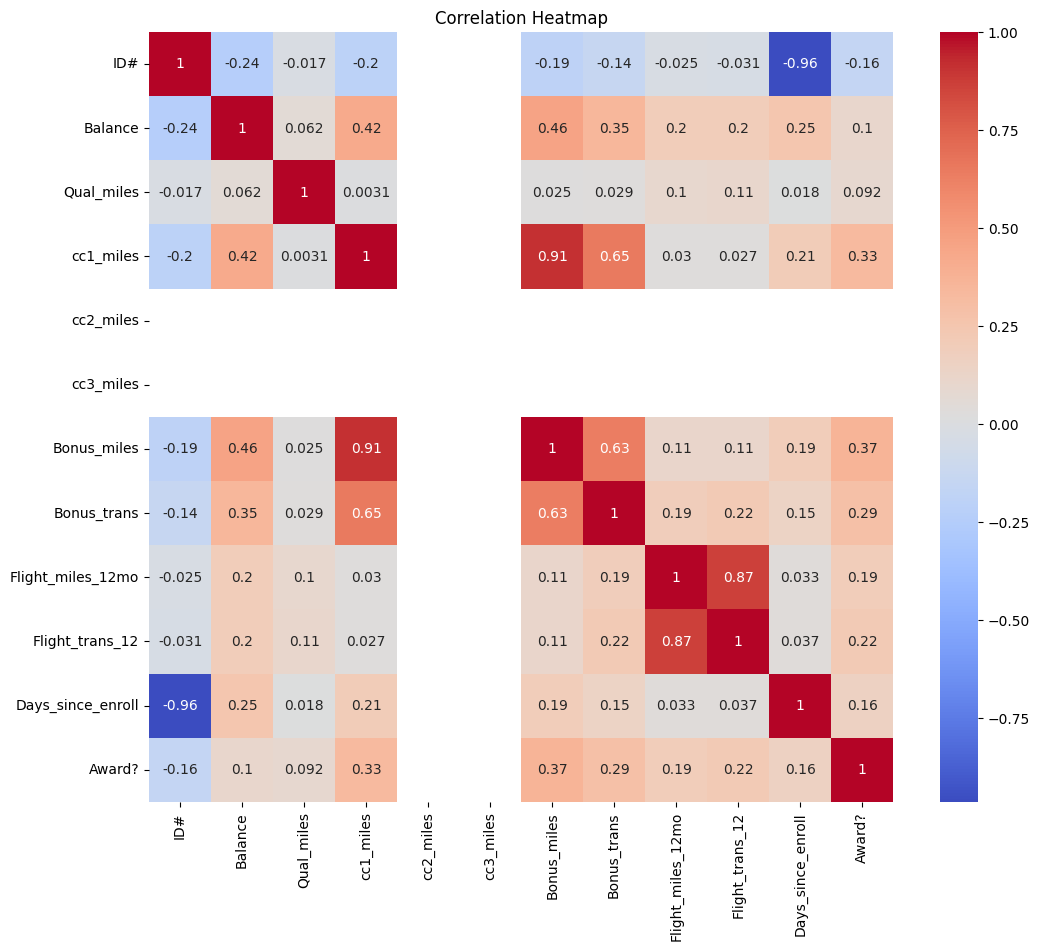

In [ ]:
# -----------------------
# Handling Missing values
# -----------------------
print("\nMissing Values:")
print(data.isnull().sum())

# Median imputation for numerical columns
for col in data.columns:
    data[col].fillna(data[col].median(), inplace=True)

# -----------------------
# Outlier Detection and Removal (Z-score method)
# -----------------------
z_scores = np.abs(stats.zscore(data))
data_cleaned = data[(z_scores < 3).all(axis=1)]

print("\nDataset shape after outlier removal:")
print(data_cleaned.shape)

# -----------------------
# Feature Scaling
# -----------------------
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned)

# Exploratory Data Analysis (EDA)

# Histograms
data_cleaned.hist(figsize=(14, 10))
plt.suptitle("Feature Distributions")
plt.show()

# Box plots
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_cleaned)
plt.xticks(rotation=45)
plt.title("Box Plot of Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data_cleaned.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## **Implementing Clustering Algorithms**

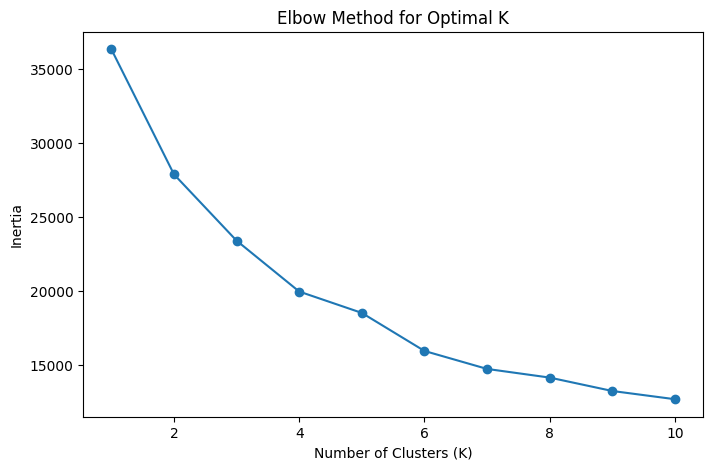


K-Means Silhouette Score:
0.29192710837860614

DBSCAN Silhouette Score:
0.2451656533285706


In [ ]:
# ------------------------------------------------------------
# K-Means Clustering
# ------------------------------------------------------------

# -----------------------
# Elbow Method to find Optimal K
# -----------------------
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker="o")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Applying K-means Clustering

kmeans_final = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans_final.fit_predict(data_scaled)

silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)

print("\nK-Means Silhouette Score:")
print(silhouette_kmeans)

# Applying DBSCAN Clustering

dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Evaluating DBSCAN Clusters
mask = dbscan_labels != -1

if len(set(dbscan_labels[mask])) > 1:
    silhouette_dbscan = silhouette_score(
        data_scaled[mask],
        dbscan_labels[mask]
    )
else:
    silhouette_dbscan = "Not Applicable (single cluster or noise)"

print("\nDBSCAN Silhouette Score:")
print(silhouette_dbscan)

## **Visualization**

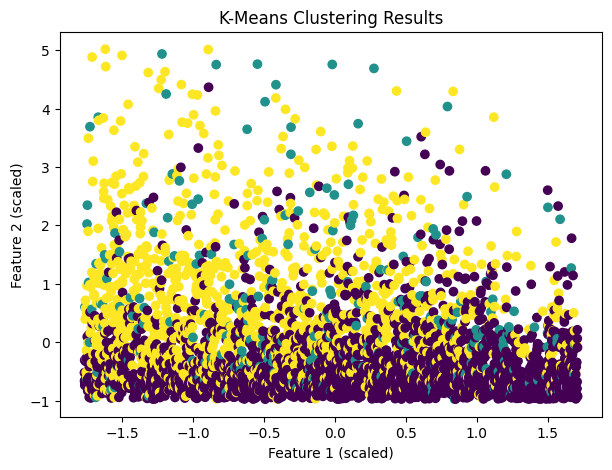

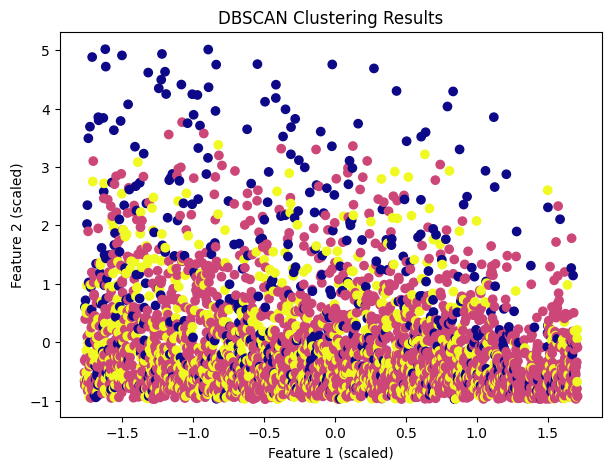

In [ ]:
# K-Means visualization
plt.figure(figsize=(7, 5))
plt.scatter(
    data_scaled[:, 0],
    data_scaled[:, 1],
    c=kmeans_labels,
    cmap="viridis")
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

# DBSCAN visualization
plt.figure(figsize=(7, 5))
plt.scatter(
    data_scaled[:, 0],
    data_scaled[:, 1],
    c=dbscan_labels,
    cmap="plasma")
plt.title("DBSCAN Clustering Results")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

## Cluster Analysis & Interpretation

In [ ]:
data_cleaned["KMeans_Cluster"] = kmeans_labels
data_cleaned["DBSCAN_Cluster"] = dbscan_labels

print("\nK-Means Cluster Profile (Mean Values):")
print(data_cleaned.groupby("KMeans_Cluster").mean())

print("\nDBSCAN Cluster Profile (Excluding Noise):")
print(
    data_cleaned[data_cleaned["DBSCAN_Cluster"] != -1]
    .groupby("DBSCAN_Cluster")
    .mean())

# COMPARISON OF CLUSTERING METHODS

print("\nClustering Evaluation Summary:")
print(f"K-Means Silhouette Score : {silhouette_kmeans}")
print(f"DBSCAN Silhouette Score  : {silhouette_dbscan}")


K-Means Cluster Profile (Mean Values):
                        ID#       Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                
0               2331.734973  36542.100638   27.233151   1.186248        1.0   
1               1926.426295  97169.737052  159.533865   2.015936        1.0   
2               1532.172443  97252.187658   37.062553   3.498732        1.0   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                     1.0   3970.405282     6.167122          96.213115   
1                     1.0  19085.649402    15.924303        2186.924303   
2                     1.0  32456.904480    17.282333         142.639053   

                Flight_trans_12  Days_since_enroll    Award?  DBSCAN_Cluster  
KMeans_Cluster                                                                
0                      0.34380

/tmp/ipython-input-3036897571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["KMeans_Cluster"] = kmeans_labels
/tmp/ipython-input-3036897571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["DBSCAN_Cluster"] = dbscan_labels


## **THEORETICAL DISCUSSION**

1.K-Means Clustering:
- Partition-based clustering technique.
- Requires predefined number of clusters (K).
- Minimizes intra-cluster variance.
- Sensitive to outliers and noise.

2.DBSCAN Clustering:
- Density-based clustering technique.
- Does not require predefined number of clusters.
- Identifies noise points explicitly.
- Can find arbitrarily shaped clusters.

3.Key Differences:
- K-Means assumes spherical clusters; DBSCAN does not.
- K-Means is sensitive to outliers; DBSCAN is robust.
- DBSCAN depends on eps and min_samples parameters.

4.Business Interpretation:
- K-Means is suitable for customer segmentation.
- DBSCAN is suitable for anomaly and outlier detection

**CONCLUSION:**

Clustering analysis of the EastWest Airlines dataset reveals
distinct customer segments. K-Means provides structured clusters,
while DBSCAN effectively identifies noise and irregular patterns.
The choice of algorithm depends on business objectives and data
characteristics.